In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Matlab-style plotting
from sodapy import Socrata
import datetime
from datetime import datetime
from datetime import timedelta

In [6]:
nyc_case_hosp = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv')

nyc_case_hosp.drop(columns= ['HOSPITALIZED_COUNT', 'DEATH_COUNT'],inplace=True)
nyc_case_hosp.rename(columns= {'DATE_OF_INTEREST':'Date', 'CASE_COUNT':'Newcase'}, inplace = True)
nyc_case_hosp['Date'] = pd.to_datetime(nyc_case_hosp['Date'])
nyc_case_hosp['Date'] = nyc_case_hosp['Date'].dt.date

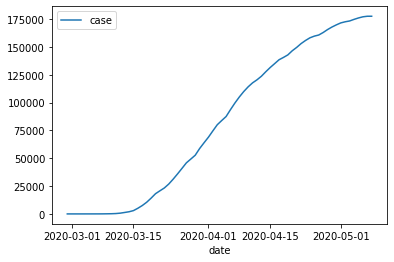

In [7]:
df_confirmed_case = pd.DataFrame(columns=['date', 'case'])
for i in range(len(nyc_case_hosp)):
    if i == 0:
        df_confirmed_case = df_confirmed_case.append(pd.DataFrame({'date':[nyc_case_hosp['Date'][i]],'case':[nyc_case_hosp['Newcase'][i]]}),ignore_index=True)
    else:
        confirmed_case = df_confirmed_case['case'][i-1] + nyc_case_hosp['Newcase'][i]
        df_confirmed_case = df_confirmed_case.append(pd.DataFrame({'date':[nyc_case_hosp['Date'][i]],'case':[confirmed_case]}),ignore_index=True)
df_confirmed_case.plot(x='date', y='case', kind='line')

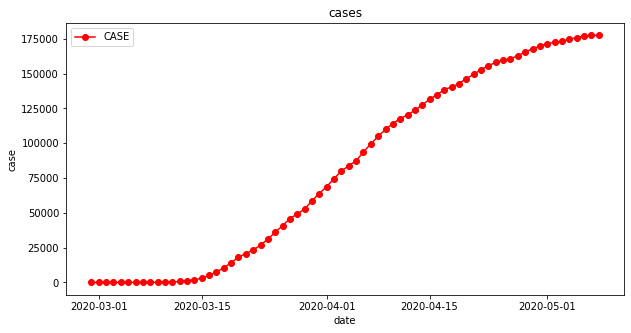

In [8]:
plt.figure(num=1, figsize=(10, 5))
plt.title("cases")
plt.plot(df_confirmed_case['date'],df_confirmed_case['case'],'o-',color = 'r',label="CASE")
plt.xlabel("date")
plt.ylabel("case")
plt.legend(loc = "best")
plt.show()

# histogram 

In [58]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get_all("8vv7-7wx3")

# Convert to pandas DataFrame
tem_df = pd.DataFrame.from_records(results)
# tem_df = tem_df[tem_df['notificationtype'].apply(lambda x: x == 'Public Health')]
tem_df.rename(columns ={'date_and_time': 'Date'}, inplace = True )
tem_df.drop(columns = ['email_body'], axis = 1, inplace=True)

tem_df['Date'] = pd.to_datetime(tem_df['Date'])
tem_df['Date'] = tem_df['Date'].dt.date

In [59]:
ds='2020-03-01'
tem_df['Date'] = tem_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
tem_df = tem_df[tem_df['Date'].apply(lambda x: x >= ds)]
date_max = tem_df['Date'].max()
week = int((datetime.strptime(date_max, '%Y-%m-%d') - datetime.strptime(ds, '%Y-%m-%d')).days/7)

In [60]:
result =pd.DataFrame(columns=('Road Closure','Public Health','Weather','Mass Transit Disruption','Mass Transit Restoration','Environmental','Missing Adult','Aerial (Fly-Over)','Utility','Public Awareness','Fire','Parking','School Notification','Missing Child / Adolescent','Structural','Drills / Exercises'))

In [61]:
ddate = []
inde = '2020-03-01'
ind = '2020-03-01'
for i in range(week):
    sdate = pd.to_datetime(ind)
    edate = str(datetime.date(sdate + timedelta(days=6)))
    sdate = ind
    col = sdate + '/' + edate
    types = tem_df.loc[(tem_df['Date'] >= sdate) & (tem_df['Date'] <= edate)].loc[:,'notificationtype'].value_counts()
    ind = str(datetime.date(pd.to_datetime(ind) + timedelta(days=7)))
    result = result.append(types)
    ddate.append(col)
result = result.fillna(0)
result.reset_index(drop=True,inplace=True)
result['Date'] = ddate
result.set_index(['Date'], inplace=True)
result

,Road Closure,Public Health,Weather,Mass Transit Disruption,Mass Transit Restoration,Environmental,Missing Adult,Aerial (Fly-Over),Utility,Public Awareness,Fire,Parking,School Notification,Missing Child / Adolescent,Structural,Drills / Exercises
Date,,,,,,,,,,,,,,,,
2020-03-01/2020-03-07,38.0,2.0,8.0,7.0,4.0,2.0,5.0,4.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
2020-03-08/2020-03-14,20.0,10.0,5.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,0.0,5.0,0.0,1.0,0.0
2020-03-15/2020-03-21,21.0,15.0,1.0,4.0,3.0,5.0,3.0,0.0,1.0,4.0,2.0,2.0,0.0,2.0,0.0,0.0
2020-03-22/2020-03-28,13.0,18.0,0.0,6.0,3.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2020-03-29/2020-04-04,12.0,12.0,5.0,5.0,4.0,3.0,6.0,3.0,3.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0
2020-04-05/2020-04-11,21.0,26.0,16.0,6.0,6.0,4.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-12/2020-04-18,15.0,12.0,7.0,5.0,5.0,4.0,3.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-04-19/2020-04-25,21.0,8.0,7.0,2.0,2.0,4.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-04-26/2020-05-02,31.0,14.0,3.0,2.0,1.0,4.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


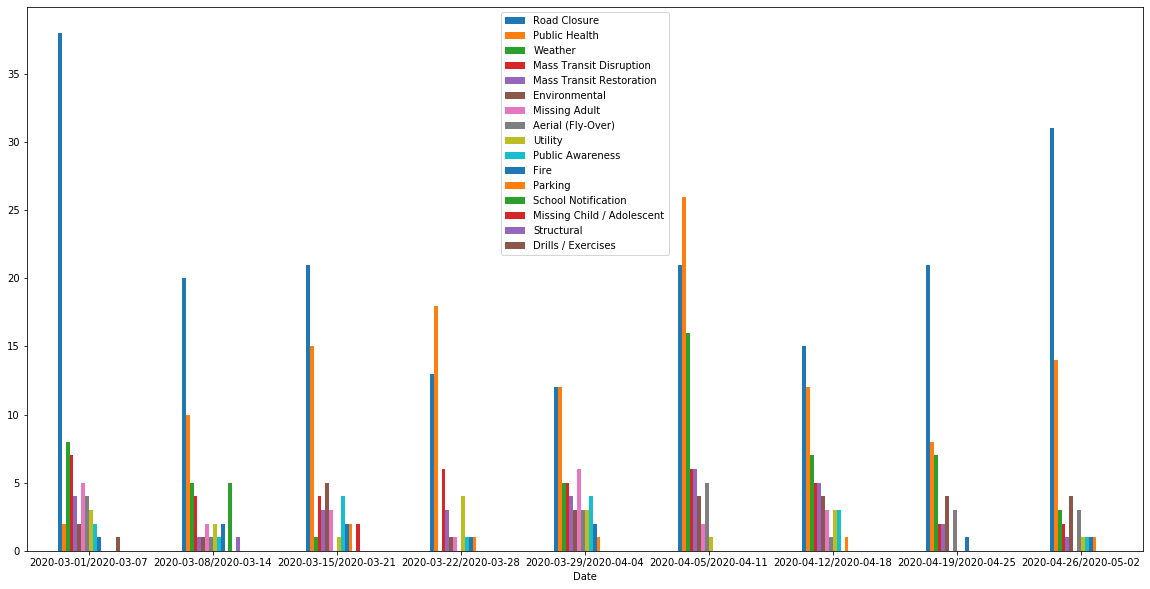

In [62]:
axes = result.plot.bar(rot = 0, figsize=(20,10))

In [63]:
res_his = pd.DataFrame(columns=('Road Closure','Public Health','Weather','Mass Transit Disruption','Mass Transit Restoration','Environmental','Missing Adult','Aerial (Fly-Over)','Utility','Public Awareness','Fire','Parking','School Notification','Missing Child / Adolescent','Structural','Drills / Exercises'))
res_sum=result.sum(axis=1)
# result['Col_sum'] = result.apply(lambda x: x.sum(), axis=1)
res_sum

Date
2020-03-01/2020-03-07    77.0
2020-03-08/2020-03-14    55.0
2020-03-15/2020-03-21    63.0
2020-03-22/2020-03-28    49.0
2020-03-29/2020-04-04    60.0
2020-04-05/2020-04-11    87.0
2020-04-12/2020-04-18    59.0
2020-04-19/2020-04-25    48.0
2020-04-26/2020-05-02    62.0
dtype: float64

In [64]:
result = result.div(res_sum, axis='rows')

In [65]:
result

,Road Closure,Public Health,Weather,Mass Transit Disruption,Mass Transit Restoration,Environmental,Missing Adult,Aerial (Fly-Over),Utility,Public Awareness,Fire,Parking,School Notification,Missing Child / Adolescent,Structural,Drills / Exercises
Date,,,,,,,,,,,,,,,,
2020-03-01/2020-03-07,0.493506,0.025974,0.103896,0.090909,0.051948,0.025974,0.064935,0.051948,0.038961,0.025974,0.012987,0.000000,0.000000,0.000000,0.000000,0.012987
2020-03-08/2020-03-14,0.363636,0.181818,0.090909,0.072727,0.018182,0.018182,0.036364,0.018182,0.036364,0.018182,0.036364,0.000000,0.090909,0.000000,0.018182,0.000000
2020-03-15/2020-03-21,0.333333,0.238095,0.015873,0.063492,0.047619,0.079365,0.047619,0.000000,0.015873,0.063492,0.031746,0.031746,0.000000,0.031746,0.000000,0.000000
2020-03-22/2020-03-28,0.265306,0.367347,0.000000,0.122449,0.061224,0.020408,0.020408,0.000000,0.081633,0.020408,0.020408,0.020408,0.000000,0.000000,0.000000,0.000000
2020-03-29/2020-04-04,0.200000,0.200000,0.083333,0.083333,0.066667,0.050000,0.100000,0.050000,0.050000,0.066667,0.033333,0.016667,0.000000,0.000000,0.000000,0.000000
2020-04-05/2020-04-11,0.241379,0.298851,0.183908,0.068966,0.068966,0.045977,0.022989,0.057471,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-12/2020-04-18,0.254237,0.203390,0.118644,0.084746,0.084746,0.067797,0.050847,0.016949,0.050847,0.050847,0.000000,0.016949,0.000000,0.000000,0.000000,0.000000
2020-04-19/2020-04-25,0.437500,0.166667,0.145833,0.041667,0.041667,0.083333,0.000000,0.062500,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-26/2020-05-02,0.500000,0.225806,0.048387,0.032258,0.016129,0.064516,0.000000,0.048387,0.016129,0.016129,0.016129,0.016129,0.000000,0.000000,0.000000,0.000000


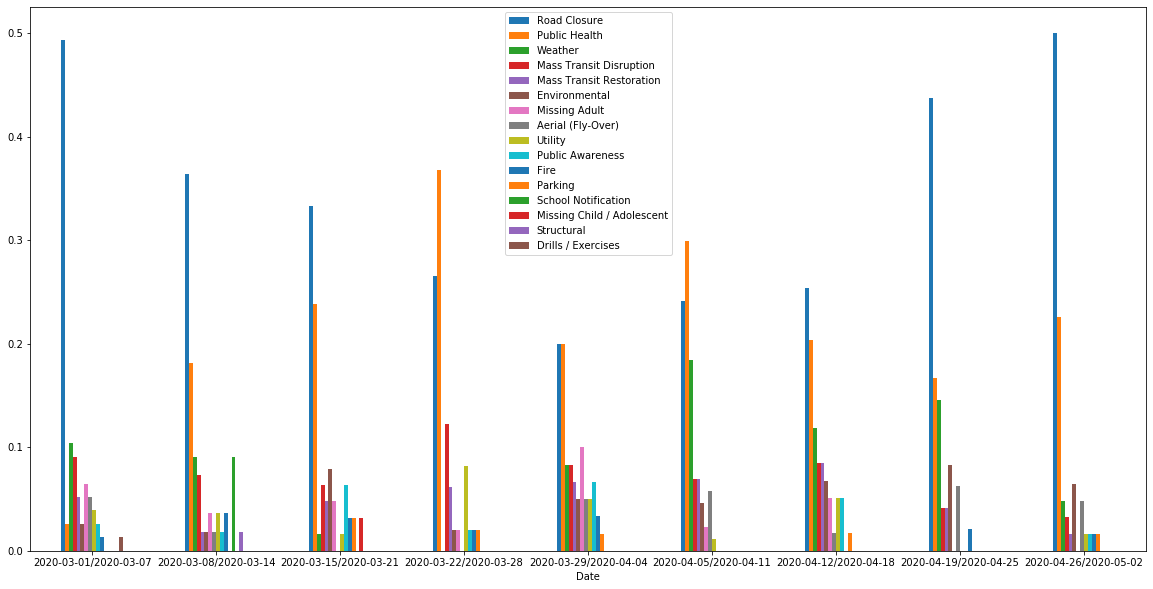

In [66]:
axes = result.plot.bar(rot = 0, figsize=(20,10))

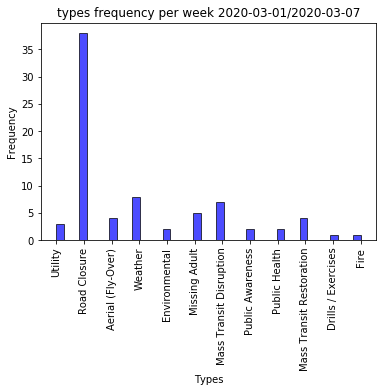

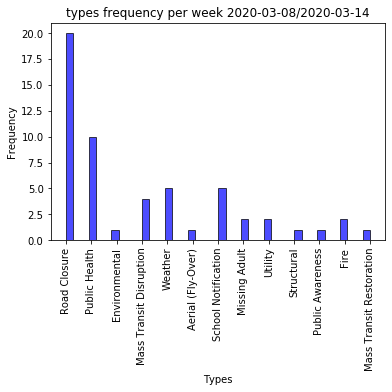

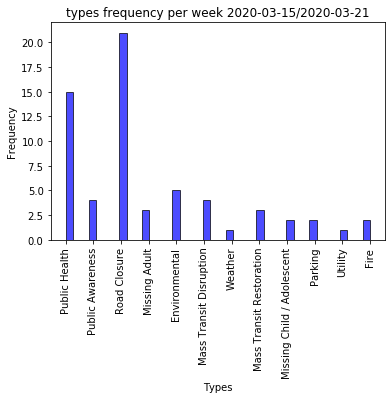

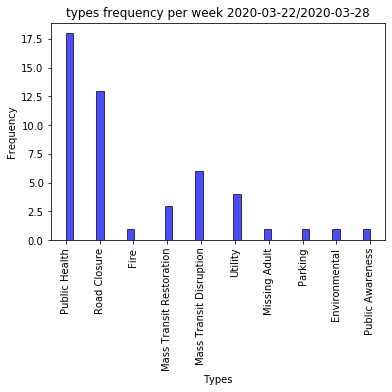

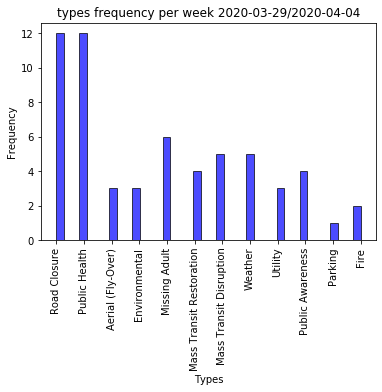

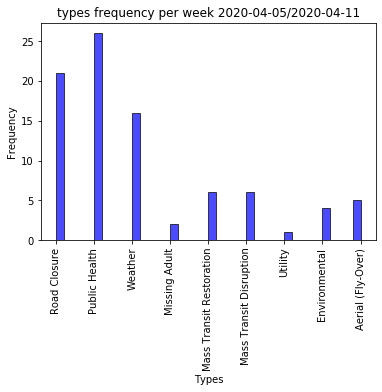

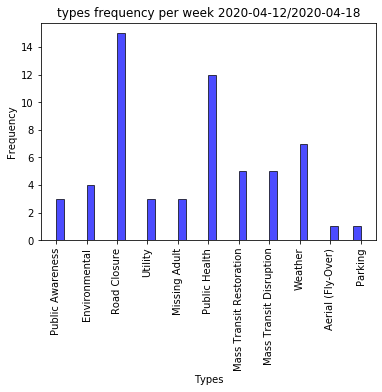

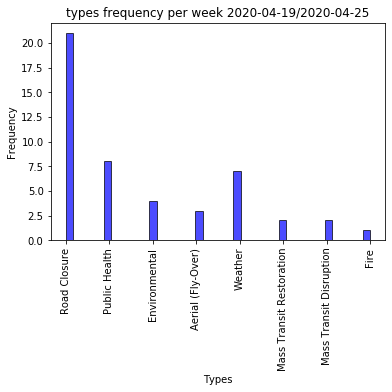

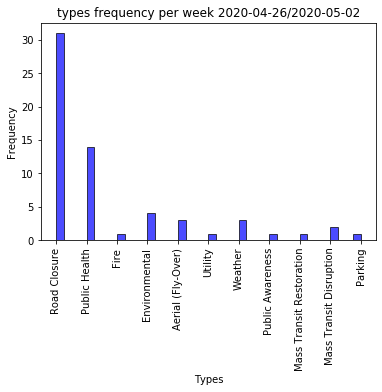

In [11]:
plt.figure(num=1)
ind = '2020-03-01'
# edate = datetime.datetime.strptime(ind, '%Y-%m-%d') + datetime.timedelta(days=7)
# print(edate)
# print(type(edate))
for i in range(week):
    sdate = pd.to_datetime(ind)
    edate = str(datetime.date(sdate + timedelta(days=6)))
    sdate = ind
    col = sdate + '/' + edate
    types = tem_df.loc[(tem_df['Date'] >= sdate) & (tem_df['Date'] <= edate)]['notificationtype']
    ind = str(datetime.date(pd.to_datetime(ind) + timedelta(days=7)))  
    #types.hist()
    #types.groupby('notificationtype').size().plot(kind='bar')
    
    plt.hist(types, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xticks(rotation=90)
    plt.xlabel("Types")
    plt.ylabel("Frequency")
    title = "types frequency per week" + " " +col
    plt.title(title)
    plt.show()